# Entanglement Distillation Two Copies of Pure States

In [ ]:
# Installing qsharp
!pip install qsharp
!pip install qsharp_widgets
!pip install qsharp.estimator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.8/178.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.7 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement qsharp.estimator (from versions: none)
ERROR: No matching distribution found for qsharp.estimator


In [ ]:
# importing necessary modules for qsharp
import numpy as np
import qsharp
from qsharp.utils import dump_operation
from qsharp_widgets import Circuit
from qsharp_widgets import SpaceChart, EstimateDetails

# General imports
import numpy as np
import matplotlib.pyplot as plt

# Qsharp
import qsharp
from qsharp_widgets import EstimatesOverview
from qsharp.estimator import EstimatorParams, QubitParams, QECScheme

### Correlator A0 tensor B0

In [ ]:
Logical_qubits_Qsharp_EC2_1 = []
Logical_depth_Qsharp_EC2_1 = []
Num_T_gates_Qsharp_EC2_1 = []
Runtime_Qsharp_EC2_1 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2; # To check that p is correct, its must be 1

In [ ]:
# S = [
#     [[0, 0, 0, 0, 0], (0.853553)**2],
#     [[0, 0, 1, 0, 1], (0.353553)**2],
#     [[0, 1, 0, 1, 0], (0.353553)**2],
#     [[0, 1, 1, 1, 1], (0.146447)**2]
# ] # You can define quantum state as hardcore values as well

S = [
    [[0, 0, 0, 0, 0], float(Cos_theta)**4],
    [[0, 0, 1, 0, 1], float(Cos_theta*Sin_theta)**2],
    [[0, 1, 0, 1, 0], float(Cos_theta*Sin_theta)**2],
    [[0, 1, 1, 1, 1], float(Sin_theta)**4]
]

# S = [
#     [[0, 0, 0, 0, 0], float(sqrt((Cos_theta)**4))],
#     [[0, 0, 1, 0, 1], float(sqrt((Cos_theta * Sin_theta)**2))],
#     [[0, 1, 0, 1, 0], float(sqrt((Cos_theta * Sin_theta)**2))],
#     [[0, 1, 1, 1, 1], float(sqrt((Sin_theta)**4))]
# ]

S

[[[0, 0, 0, 0, 0], 0.6399999999999993],
 [[0, 0, 1, 0, 1], 0.1599999999999999],
 [[0, 1, 0, 1, 0], 0.1599999999999999],
 [[0, 1, 1, 1, 1], 0.039999999999999994]]

In [ ]:
0.6399999999999993**0.5

0.7999999999999996

In [ ]:
0.1599999999999999**0.5

In [ ]:
0.39999999999999986**2

0.1599999999999999

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)

In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;



operation test(p:Double , n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {

    //The below code will prepare quantum state

    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }




    //State preparation completes here!
    Microsoft.Quantum.Diagnostics.DumpMachine();

    operation Barrier() : Unit is Adj + Ctl {
    // No operation — acts as a placeholder
    Message("=== Barrier ===");
    }

    Barrier(); // Logical barrier

    //The EPR state preparation starts here!

    operation ApplyUnitary(theta:Double , target: Qubit) : Unit is Adj + Ctl {
        Ry(theta, target);
      }

    operation ApplyCCU1(theta:Double, control1: Qubit, target: Qubit) : Unit {
         Controlled ApplyUnitary([control1], (theta,target));
      }

    X(q[2]);
    X(q[3]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    let x = ArcCos((Sqrt(p) + Sqrt(1.0 - p)) / Sqrt(2.0));
    let a = Sqrt((2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)) / (Cos(x)^4.0));
    let b = Sqrt((Cos(x)^4.0 - 2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) - (Sin(x)^4.0)) / (Cos(x)^4.0));
    let theta = ArcTan2(b, a);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[2]);
    X(q[3]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    //// Measurement 2
    let r1 = M(q[4]);
    ////Reset(q[4]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    X(q[2]);
    X(q[3]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    let a0 = Sqrt(3.0 * (Sin(x)^4.0) / (2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)));
    let b0 = Sqrt((2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) - 2.0 * (Sin(x)^4.0)) / (2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)));
    let theta = ArcTan2(b0, a0);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[2]);
    X(q[3]);

    X(q[3]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    let r = 4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)+ 2.0 * Sin(x) * Sin(x) * Sin(x) * Sin(x);
    let t = 4.0 * (Cos(x) * Cos(x) * Sin(x) * Sin(x) - Sin(x) * Sin(x) * Sin(x) * Sin(x)) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x) + 2.0 * Sin(x) * Sin(x) * Sin(x) * Sin(x));
    let a1 = Sqrt(Sin(x) * Sin(x) * Sin(x) * Sin(x) / (Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let b1 = Sqrt((r * t) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let theta = ArcTan2(b1, a1);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    Microsoft.Quantum.Diagnostics.DumpMachine();

    //X(q[3]);
    //X(q[2]);

    //let a2 = Sqrt(Sin(x) * Sin(x) * Sin(x) * Sin(x) / (Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    //let b2 = Sqrt((r * t) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    //let theta = ArcTan2(b2, a2);

    //ApplyCCU1(theta, q[2],q[4]);
    //CNOT(q[2],q[3]);
    //ApplyCCU1(-theta, q[3],q[4]);
    //CNOT(q[2],q[3]);
    //ApplyCCU1(theta, q[3],q[4]);

    //X(q[2]);

    ////Microsoft.Quantum.Diagnostics.DumpMachine();

    ////Measurement 2
    //let r2 = M(q[4]);
    ////Reset(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    //X(q[4]);

    //X(q[2]);
    //X(q[3]);

    //ApplyCCU1(PI()/4.0, q[2],q[4]);
    //CNOT(q[2],q[3]);
    //ApplyCCU1(-PI()/4.0, q[3],q[4]);
    //CNOT(q[2],q[3]);
    //ApplyCCU1(PI()/4.0, q[3],q[4]);

    //X(q[2]);
    //X(q[3]);

    //X(q[3]);

    //CCNOT(q[2], q[3], q[4]);

    //X(q[3]);

    ////Final measurement
    //let r3 = M(q[4]);
    ////Reset(q[4]);

    //CNOT(q[3],q[2]);
    //CNOT(q[1],q[0]);


    ////EPR state prepared here!
    //Microsoft.Quantum.Diagnostics.DumpMachine();


    Barrier(); // Logical barrier


    ////Optimal Measurements starts here!

    ////A0:
    ////Z basis, no rotation
    ////B0:
    //Ry(-PI() / 4.0, q[2]);


    //// Optimal Measurements completes here!
    //Microsoft.Quantum.Diagnostics.DumpMachine();


    ////ResetAll(q);
    ////let result0 = M(q[0]);
    ////let result2 = M(q[2]);

    ////Print the measurement results
    ////Message($"Qubit 0: {result0}, Qubit 2: {result2}");




    ResetAll(q);

}



operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }

In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|00000⟩: 0.8000+0.0000𝑖
|01010⟩: 0.4000+0.0000𝑖
|10100⟩: 0.4000+0.0000𝑖
|11110⟩: 0.2000+0.0000𝑖
=== Barrier ===
STATE:
|00010⟩: 0.4082+0.0000𝑖
|00011⟩: 0.5774+0.0000𝑖
|01000⟩: 0.4714+0.0000𝑖
|10110⟩: 0.2357+0.0000𝑖
|10111⟩: 0.4082+0.0000𝑖
|11100⟩: 0.2357+0.0000𝑖
=== Barrier ===


In [ ]:
0.6667**2+0.4714**2+0.4714**2+0.3333**2

1.0000137

In [ ]:
0.3333**0.5

0.5773214009544424

In [ ]:
0.4714**0.5

0.6865857557508749

In [ ]:
0.6667**0.5

0.8165169930871004

In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 139876,
  'runtime': 2283600,
  'rqops': 4090910,
  'breakdown': {'algorithmicLogicalQubits': 18,
   'algorithmicLogicalDepth': 519,
   'logicalDepth': 519,
   'numTstates': 509,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 14,
   'numTfactoryRuns': 37,
   'physicalQubitsForTfactories': 135520,
   'physicalQubitsForAlgorithm': 4356,
   'requiredLogicalQubitErrorRate': 3.56811532148719e-08,
   'requiredLogicalTstateErrorRate': 6.548788474132285e-07,
   'numTsPerRotation': 14,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '2 millisecs',
  'rqops': '4.09M',
  'physicalQubits': '139.88k',
  'algorithmicLogicalQubits': '18',
  'algorithmicLogicalDepth': '519',
  'logicalDepth': '519',
  'numTstates': '509',
  'numTfactories': '14',
  'numTfactoryRuns': '37',
  'physicalQubitsForAlgorithm': '4.36k',
  'physicalQubitsForTfactories': '135.52k',
  'physicalQubitsForTfactoriesPercentage': '96.89 %',
  'requiredLogicalQubitErrorRate': '3.57e-8',
  'requiredLogicalTstateErrorRate': '6.55e-7',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '9.68k',
  'tfactoryRuntime': '57 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '11',
  'physicalQubitsPerRound': '9.68k',
  'tfactoryRuntimePerRound': '57 microsecs',
  'tstateLogicalErrorRate': '2.48e-7',
  'logicalCountsNumQubits': '5',
  'logicalCountsTCount': '1',
  'logicalCountsRotationCount': '36',
  'logicalCountsRotationDepth': '34',
  'logicalCountsCczCount': '1',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '3',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '14',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 9680,
  'runtime': 57200,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [11],
  'physicalQubitsPerRound': [9680],
  'runtimePerRound': [57200],
  'logicalErrorRate': 2.480000000000001e-07},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 5,
  'tCount': 1,
  'rotationCount': 36,
  'rotationDepth': 34,
  'cczCount': 1,
  'ccixCount': 0,
  'measurementCount': 3},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime 

In [ ]:
SpaceChart(result)

SpaceChart(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code', 'errorCorrectio…

In [ ]:
results = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(results)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_states = result['physicalCounts']["breakdown"]["numTstates"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_EC2_1.append(logical_qubits)
Logical_depth_Qsharp_EC2_1.append(logical_depth)
Num_T_gates_Qsharp_EC2_1.append(Num_T_states)
Runtime_Qsharp_EC2_1.append(Runtime)

print("Logical_qubits_Qsharp_EC2_1 = ",Logical_qubits_Qsharp_EC2_1)
print("Logical_depth_Qsharp_EC2_1 = ",Logical_depth_Qsharp_EC2_1)
print("Num_T_gates_Qsharp_EC2_1 = ",Num_T_gates_Qsharp_EC2_1)
print("Runtime_Qsharp_EC2_1 = ",Runtime_Qsharp_EC2_1)

Logical_qubits_Qsharp_EC2_1 =  [18]
Logical_depth_Qsharp_EC2_1 =  [519]
Num_T_gates_Qsharp_EC2_1 =  [509]
Runtime_Qsharp_EC2_1 =  [0.0022836]


In [ ]:
Logical_qubits_Qsharp_EC2_1 =  [18, 18,18, 18, 18]
Logical_depth_Qsharp_EC2_1 =  [518, 518,518, 518, 518]
Num_T_gates_Qsharp_EC2_1 =  [508, 508, 508,508, 508]
Runtime_Qsharp_EC2_1 =  [0.0022792000000000003, 0.0022792000000000003, 0.0022792000000000003,0.0022792000000000003, 0.0022792000000000003]

### Correlators A0 tensor B1

In [ ]:
Logical_qubits_Qsharp_EC2_2 = []
Logical_depth_Qsharp_EC2_2 = []
Num_T_gates_Qsharp_EC2_2 = []
Runtime_Qsharp_EC2_2 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2;

In [ ]:
# S = [
#     [[0, 0, 0, 0, 0], (0.853553)**2],
#     [[0, 0, 1, 0, 1], (0.353553)**2],
#     [[0, 1, 0, 1, 0], (0.353553)**2],
#     [[0, 1, 1, 1, 1], (0.146447)**2]
# ]

# S = [
#     [[0, 0, 0, 0, 0], float(Cos_theta)**4],
#     [[0, 0, 1, 0, 1], float(Cos_theta*Sin_theta)**2],
#     [[0, 1, 0, 1, 0], float(Cos_theta*Sin_theta)**2],
#     [[0, 1, 1, 1, 1], float(Sin_theta)**4]
# ]


S = [
    [[0, 0, 0, 0, 0], float(sqrt((Cos_theta)**4))],
    [[0, 0, 1, 0, 1], float(sqrt((Cos_theta * Sin_theta)**2))],
    [[0, 1, 0, 1, 0], float(sqrt((Cos_theta * Sin_theta)**2))],
    [[0, 1, 1, 1, 1], float(sqrt((Sin_theta)**4))]
]

S

[[[0, 0, 0, 0, 0], 0.7999999999999996],
 [[0, 0, 1, 0, 1], 0.39999999999999986],
 [[0, 1, 0, 1, 0], 0.39999999999999986],
 [[0, 1, 1, 1, 1], 0.19999999999999998]]

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)

In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;



operation test(p:Double , n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {


    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }
      operation ApplyUnitary(theta:Double , target: Qubit) : Unit is Adj + Ctl {
        Ry(theta, target);
      }

      operation ApplyCCU1(theta:Double, control1: Qubit, target: Qubit) : Unit {
         Controlled ApplyUnitary([control1], (theta,target));
      }

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    //
    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    //
    let x = ArcCos((Sqrt(p) + Sqrt(1.0 - p)) / Sqrt(2.0));
    let a = Sqrt((2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)) / (Cos(x)^4.0));
    let b = Sqrt((Cos(x)^4.0 - 2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) - (Sin(x)^4.0)) / (Cos(x)^4.0));
    let theta = ArcTan2(b, a);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    // Measurement 2
    let r1 = M(q[4]);
    //Reset(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    let a0 = Sqrt(3.0 * (Sin(x)^4.0) / (2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)));
    let b0 = Sqrt((2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) - 2.0 * (Sin(x)^4.0)) / (2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)));
    let theta = ArcTan2(b0, a0);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[2]);
    X(q[3]);

    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    let r = 4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)+ 2.0 * Sin(x) * Sin(x) * Sin(x) * Sin(x);
    let t = 4.0 * (Cos(x) * Cos(x) * Sin(x) * Sin(x) - Sin(x) * Sin(x) * Sin(x) * Sin(x)) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x) + 2.0 * Sin(x) * Sin(x) * Sin(x) * Sin(x));
    let a1 = Sqrt(Sin(x) * Sin(x) * Sin(x) * Sin(x) / (Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let b1 = Sqrt((r * t) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let theta = ArcTan2(b1, a1);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[3]);

    X(q[2]);

    let a2 = Sqrt(Sin(x) * Sin(x) * Sin(x) * Sin(x) / (Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let b2 = Sqrt((r * t) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let theta = ArcTan2(b2, a2);

    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    X(q[2]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    // Measurement 2
    let r2 = M(q[4]);
    //Reset(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    X(q[2]);
    X(q[3]);

    ApplyCCU1(PI()/4.0, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-PI()/4.0, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(PI()/4.0, q[3],q[4]);

    X(q[2]);
    X(q[3]);

    X(q[3]);

    CCNOT(q[2], q[3], q[4]);

    X(q[3]);

    // Final measurement
    let r3 = M(q[4]);
    //Reset(q[4]);

    CNOT(q[3],q[2]);
    CNOT(q[1],q[0]);


    Microsoft.Quantum.Diagnostics.DumpMachine();

    //Optimal Measurements

    // A0: Z basis, no rotation
    //B1:
    Ry(PI() / 4.0, q[2]);

    Microsoft.Quantum.Diagnostics.DumpMachine();


    //ResetAll(q);
    //let result0 = M(q[0]);
    //let result2 = M(q[2]);

    // Print the measurement results
    //Message($"Qubit 0: {result0}, Qubit 2: {result2}");




    ResetAll(q);

}



operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }

In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|00001⟩: 0.5774+0.0000𝑖
|10101⟩: 0.8165+0.0000𝑖
STATE:
|00001⟩: 0.5334+0.0000𝑖
|00101⟩: 0.2209+0.0000𝑖
|10001⟩: −0.3125+0.0000𝑖
|10101⟩: 0.7543+0.0000𝑖


In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 139876,
  'runtime': 2283600,
  'rqops': 4090910,
  'breakdown': {'algorithmicLogicalQubits': 18,
   'algorithmicLogicalDepth': 519,
   'logicalDepth': 519,
   'numTstates': 509,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 14,
   'numTfactoryRuns': 37,
   'physicalQubitsForTfactories': 135520,
   'physicalQubitsForAlgorithm': 4356,
   'requiredLogicalQubitErrorRate': 3.56811532148719e-08,
   'requiredLogicalTstateErrorRate': 6.548788474132285e-07,
   'numTsPerRotation': 14,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '2 millisecs',
  'rqops': '4.09M',
  'physicalQubits': '139.88k',
  'algorithmicLogicalQubits': '18',
  'algorithmicLogicalDepth': '519',
  'logicalDepth': '519',
  'numTstates': '509',
  'numTfactories': '14',
  'numTfactoryRuns': '37',
  'physicalQubitsForAlgorithm': '4.36k',
  'physicalQubitsForTfactories': '135.52k',
  'physicalQubitsForTfactoriesPercentage': '96.89 %',
  'requiredLogicalQubitErrorRate': '3.57e-8',
  'requiredLogicalTstateErrorRate': '6.55e-7',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '9.68k',
  'tfactoryRuntime': '57 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '11',
  'physicalQubitsPerRound': '9.68k',
  'tfactoryRuntimePerRound': '57 microsecs',
  'tstateLogicalErrorRate': '2.48e-7',
  'logicalCountsNumQubits': '5',
  'logicalCountsTCount': '1',
  'logicalCountsRotationCount': '36',
  'logicalCountsRotationDepth': '34',
  'logicalCountsCczCount': '1',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '3',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '14',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 9680,
  'runtime': 57200,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [11],
  'physicalQubitsPerRound': [9680],
  'runtimePerRound': [57200],
  'logicalErrorRate': 2.480000000000001e-07},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 5,
  'tCount': 1,
  'rotationCount': 36,
  'rotationDepth': 34,
  'cczCount': 1,
  'ccixCount': 0,
  'measurementCount': 3},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime 

In [ ]:
SpaceChart(result)

SpaceChart(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code', 'errorCorrectio…

In [ ]:
results = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(results)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_states = result['physicalCounts']["breakdown"]["numTstates"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_EC2_2.append(logical_qubits)
Logical_depth_Qsharp_EC2_2.append(logical_depth)
Num_T_gates_Qsharp_EC2_2.append(Num_T_states)
Runtime_Qsharp_EC2_2.append(Runtime)

print("Logical_qubits_Qsharp_EC2_2 = ",Logical_qubits_Qsharp_EC2_2)
print("Logical_depth_Qsharp_EC2_2 = ",Logical_depth_Qsharp_EC2_2)
print("Num_T_gates_Qsharp_EC2_2 = ",Num_T_gates_Qsharp_EC2_2)
print("Runtime_Qsharp_EC2_2 = ",Runtime_Qsharp_EC2_2)

Logical_qubits_Qsharp_EC2_2 =  [18, 18, 18]
Logical_depth_Qsharp_EC2_2 =  [519, 519, 519]
Num_T_gates_Qsharp_EC2_2 =  [509, 509, 509]
Runtime_Qsharp_EC2_2 =  [0.0022836, 0.0022836, 0.0022836]


In [ ]:
Logical_qubits_Qsharp_EC2_2 =  [18, 18, 18, 18, 18]
Logical_depth_Qsharp_EC2_2 =  [519, 519,519, 519, 519]
Num_T_gates_Qsharp_EC2_2 =  [509, 509,509, 509, 509]
Runtime_Qsharp_EC2_2 =  [0.0022836, 0.0022836,0.0022836, 0.0022836, 0.0022836]

### Correlators A1 tensor B0

In [ ]:
Logical_qubits_Qsharp_EC2_3 = []
Logical_depth_Qsharp_EC2_3 = []
Num_T_gates_Qsharp_EC2_3 = []
Runtime_Qsharp_EC2_3 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2;

In [ ]:
# S = [
#     [[0, 0, 0, 0, 0], (0.853553)**2],
#     [[0, 0, 1, 0, 1], (0.353553)**2],
#     [[0, 1, 0, 1, 0], (0.353553)**2],
#     [[0, 1, 1, 1, 1], (0.146447)**2]
# ]

# S = [
#     [[0, 0, 0, 0, 0], float(Cos_theta)**4],
#     [[0, 0, 1, 0, 1], float(Cos_theta*Sin_theta)**2],
#     [[0, 1, 0, 1, 0], float(Cos_theta*Sin_theta)**2],
#     [[0, 1, 1, 1, 1], float(Sin_theta)**4]
# ]


S = [
    [[0, 0, 0, 0, 0], float(sqrt((Cos_theta)**4))],
    [[0, 0, 1, 0, 1], float(sqrt((Cos_theta * Sin_theta)**2))],
    [[0, 1, 0, 1, 0], float(sqrt((Cos_theta * Sin_theta)**2))],
    [[0, 1, 1, 1, 1], float(sqrt((Sin_theta)**4))]
]

S

[[[0, 0, 0, 0, 0], 0.7999999999999996],
 [[0, 0, 1, 0, 1], 0.39999999999999986],
 [[0, 1, 0, 1, 0], 0.39999999999999986],
 [[0, 1, 1, 1, 1], 0.19999999999999998]]

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)

In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;



operation test(p:Double , n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {


    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }
      operation ApplyUnitary(theta:Double , target: Qubit) : Unit is Adj + Ctl {
        Ry(theta, target);
      }

      operation ApplyCCU1(theta:Double, control1: Qubit, target: Qubit) : Unit {
         Controlled ApplyUnitary([control1], (theta,target));
      }

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    //
    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    //
    let x = ArcCos((Sqrt(p) + Sqrt(1.0 - p)) / Sqrt(2.0));
    let a = Sqrt((2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)) / (Cos(x)^4.0));
    let b = Sqrt((Cos(x)^4.0 - 2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) - (Sin(x)^4.0)) / (Cos(x)^4.0));
    let theta = ArcTan2(b, a);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    // Measurement 2
    let r1 = M(q[4]);
    //Reset(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    let a0 = Sqrt(3.0 * (Sin(x)^4.0) / (2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)));
    let b0 = Sqrt((2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) - 2.0 * (Sin(x)^4.0)) / (2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)));
    let theta = ArcTan2(b0, a0);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[2]);
    X(q[3]);

    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    let r = 4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)+ 2.0 * Sin(x) * Sin(x) * Sin(x) * Sin(x);
    let t = 4.0 * (Cos(x) * Cos(x) * Sin(x) * Sin(x) - Sin(x) * Sin(x) * Sin(x) * Sin(x)) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x) + 2.0 * Sin(x) * Sin(x) * Sin(x) * Sin(x));
    let a1 = Sqrt(Sin(x) * Sin(x) * Sin(x) * Sin(x) / (Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let b1 = Sqrt((r * t) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let theta = ArcTan2(b1, a1);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[3]);

    X(q[2]);

    let a2 = Sqrt(Sin(x) * Sin(x) * Sin(x) * Sin(x) / (Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let b2 = Sqrt((r * t) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let theta = ArcTan2(b2, a2);

    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    X(q[2]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    // Measurement 2
    let r2 = M(q[4]);
    //Reset(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    X(q[2]);
    X(q[3]);

    ApplyCCU1(PI()/4.0, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-PI()/4.0, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(PI()/4.0, q[3],q[4]);

    X(q[2]);
    X(q[3]);

    X(q[3]);

    CCNOT(q[2], q[3], q[4]);

    X(q[3]);

    // Final measurement
    let r3 = M(q[4]);
    //Reset(q[4]);

    CNOT(q[3],q[2]);
    CNOT(q[1],q[0]);


    Microsoft.Quantum.Diagnostics.DumpMachine();

    //Optimal Measurements

    // A1:
    //H(q[0]);
    //Ry(PI() / 2.0, q[0]);
    //B0
    Ry(-PI() / 4.0, q[2]);

    Microsoft.Quantum.Diagnostics.DumpMachine();


    //ResetAll(q);
    //let result0 = M(q[0]);
    //let result2 = M(q[2]);

    // Print the measurement results
    //Message($"Qubit 0: {result0}, Qubit 2: {result2}");




    ResetAll(q);

}



operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }

In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|00000⟩: 0.7071+0.0000𝑖
|11110⟩: 0.7071+0.0000𝑖
STATE:
|00000⟩: 0.4619+0.0000𝑖
|00100⟩: −0.1913+0.0000𝑖
|01010⟩: 0.1913+0.0000𝑖
|01110⟩: 0.4619+0.0000𝑖
|10000⟩: −0.4619+0.0000𝑖
|10100⟩: 0.1913+0.0000𝑖
|11010⟩: 0.1913+0.0000𝑖
|11110⟩: 0.4619+0.0000𝑖


In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 139876,
  'runtime': 2283600,
  'rqops': 4090910,
  'breakdown': {'algorithmicLogicalQubits': 18,
   'algorithmicLogicalDepth': 519,
   'logicalDepth': 519,
   'numTstates': 509,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 14,
   'numTfactoryRuns': 37,
   'physicalQubitsForTfactories': 135520,
   'physicalQubitsForAlgorithm': 4356,
   'requiredLogicalQubitErrorRate': 3.56811532148719e-08,
   'requiredLogicalTstateErrorRate': 6.548788474132285e-07,
   'numTsPerRotation': 14,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '2 millisecs',
  'rqops': '4.09M',
  'physicalQubits': '139.88k',
  'algorithmicLogicalQubits': '18',
  'algorithmicLogicalDepth': '519',
  'logicalDepth': '519',
  'numTstates': '509',
  'numTfactories': '14',
  'numTfactoryRuns': '37',
  'physicalQubitsForAlgorithm': '4.36k',
  'physicalQubitsForTfactories': '135.52k',
  'physicalQubitsForTfactoriesPercentage': '96.89 %',
  'requiredLogicalQubitErrorRate': '3.57e-8',
  'requiredLogicalTstateErrorRate': '6.55e-7',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '9.68k',
  'tfactoryRuntime': '57 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '11',
  'physicalQubitsPerRound': '9.68k',
  'tfactoryRuntimePerRound': '57 microsecs',
  'tstateLogicalErrorRate': '2.48e-7',
  'logicalCountsNumQubits': '5',
  'logicalCountsTCount': '1',
  'logicalCountsRotationCount': '36',
  'logicalCountsRotationDepth': '34',
  'logicalCountsCczCount': '1',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '3',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '14',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 9680,
  'runtime': 57200,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [11],
  'physicalQubitsPerRound': [9680],
  'runtimePerRound': [57200],
  'logicalErrorRate': 2.480000000000001e-07},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 5,
  'tCount': 1,
  'rotationCount': 36,
  'rotationDepth': 34,
  'cczCount': 1,
  'ccixCount': 0,
  'measurementCount': 3},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime 

In [ ]:
SpaceChart(result)

SpaceChart(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code', 'errorCorrectio…

In [ ]:
results = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(results)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_states = result['physicalCounts']["breakdown"]["numTstates"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_EC2_3.append(logical_qubits)
Logical_depth_Qsharp_EC2_3.append(logical_depth)
Num_T_gates_Qsharp_EC2_3.append(Num_T_states)
Runtime_Qsharp_EC2_3.append(Runtime)

print("Logical_qubits_Qsharp_EC2_3 = ",Logical_qubits_Qsharp_EC2_3)
print("Logical_depth_Qsharp_EC2_3 = ",Logical_depth_Qsharp_EC2_3)
print("Num_T_gates_Qsharp_EC2_3 = ",Num_T_gates_Qsharp_EC2_3)
print("Runtime_Qsharp_EC2_3 = ",Runtime_Qsharp_EC2_3)

Logical_qubits_Qsharp_EC2_3 =  [18, 18, 18, 18, 18]
Logical_depth_Qsharp_EC2_3 =  [519, 519, 519, 519, 519]
Num_T_gates_Qsharp_EC2_3 =  [509, 509, 509, 509, 509]
Runtime_Qsharp_EC2_3 =  [0.0022836, 0.0022836, 0.0022836, 0.0022836, 0.0022836]


### A1 tensor B1

In [ ]:
Logical_qubits_Qsharp_EC2_4 = []
Logical_depth_Qsharp_EC2_4 = []
Num_T_gates_Qsharp_EC2_4 = []
Runtime_Qsharp_EC2_4 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2;

In [ ]:
# S = [
#     [[0, 0, 0, 0, 0], (0.853553)**2],
#     [[0, 0, 1, 0, 1], (0.353553)**2],
#     [[0, 1, 0, 1, 0], (0.353553)**2],
#     [[0, 1, 1, 1, 1], (0.146447)**2]
# ]

# S = [
#     [[0, 0, 0, 0, 0], float(Cos_theta)**4],
#     [[0, 0, 1, 0, 1], float(Cos_theta*Sin_theta)**2],
#     [[0, 1, 0, 1, 0], float(Cos_theta*Sin_theta)**2],
#     [[0, 1, 1, 1, 1], float(Sin_theta)**4]
# ]


S = [
    [[0, 0, 0, 0, 0], float(sqrt((Cos_theta)**4))],
    [[0, 0, 1, 0, 1], float(sqrt((Cos_theta * Sin_theta)**2))],
    [[0, 1, 0, 1, 0], float(sqrt((Cos_theta * Sin_theta)**2))],
    [[0, 1, 1, 1, 1], float(sqrt((Sin_theta)**4))]
]

S

[[[0, 0, 0, 0, 0], 0.7999999999999996],
 [[0, 0, 1, 0, 1], 0.39999999999999986],
 [[0, 1, 0, 1, 0], 0.39999999999999986],
 [[0, 1, 1, 1, 1], 0.19999999999999998]]

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)

In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;



operation test(p:Double , n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {


    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }
      operation ApplyUnitary(theta:Double , target: Qubit) : Unit is Adj + Ctl {
        Ry(theta, target);
      }

      operation ApplyCCU1(theta:Double, control1: Qubit, target: Qubit) : Unit {
         Controlled ApplyUnitary([control1], (theta,target));
      }

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    //
    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    //
    let x = ArcCos((Sqrt(p) + Sqrt(1.0 - p)) / Sqrt(2.0));
    let a = Sqrt((2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)) / (Cos(x)^4.0));
    let b = Sqrt((Cos(x)^4.0 - 2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) - (Sin(x)^4.0)) / (Cos(x)^4.0));
    let theta = ArcTan2(b, a);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    // Measurement 2
    let r1 = M(q[4]);
    //Reset(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    X(q[2]);
    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    let a0 = Sqrt(3.0 * (Sin(x)^4.0) / (2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)));
    let b0 = Sqrt((2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) - 2.0 * (Sin(x)^4.0)) / (2.0 * (Cos(x)^2.0) * (Sin(x)^2.0) + (Sin(x)^4.0)));
    let theta = ArcTan2(b0, a0);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[2]);
    X(q[3]);

    X(q[3]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    let r = 4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)+ 2.0 * Sin(x) * Sin(x) * Sin(x) * Sin(x);
    let t = 4.0 * (Cos(x) * Cos(x) * Sin(x) * Sin(x) - Sin(x) * Sin(x) * Sin(x) * Sin(x)) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x) + 2.0 * Sin(x) * Sin(x) * Sin(x) * Sin(x));
    let a1 = Sqrt(Sin(x) * Sin(x) * Sin(x) * Sin(x) / (Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let b1 = Sqrt((r * t) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let theta = ArcTan2(b1, a1);
    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[3]);

    X(q[2]);

    let a2 = Sqrt(Sin(x) * Sin(x) * Sin(x) * Sin(x) / (Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let b2 = Sqrt((r * t) / (4.0 * Cos(x) * Cos(x) * Sin(x) * Sin(x)));
    let theta = ArcTan2(b2, a2);

    ApplyCCU1(theta, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-theta, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(theta, q[3],q[4]);

    X(q[2]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    // Measurement 2
    let r2 = M(q[4]);
    //Reset(q[4]);

    //Microsoft.Quantum.Diagnostics.DumpMachine();

    X(q[4]);

    X(q[2]);
    X(q[3]);

    ApplyCCU1(PI()/4.0, q[2],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(-PI()/4.0, q[3],q[4]);
    CNOT(q[2],q[3]);
    ApplyCCU1(PI()/4.0, q[3],q[4]);

    X(q[2]);
    X(q[3]);

    X(q[3]);

    CCNOT(q[2], q[3], q[4]);

    X(q[3]);

    // Final measurement
    let r3 = M(q[4]);
    //Reset(q[4]);

    CNOT(q[3],q[2]);
    CNOT(q[1],q[0]);


    Microsoft.Quantum.Diagnostics.DumpMachine();

    //Optimal Measurements

    // A1:
    H(q[0]);
    //Ry(PI() / 2.0, q[0]);
    // B1:
    Ry(PI() / 4.0, q[2]);

    Microsoft.Quantum.Diagnostics.DumpMachine();


    //ResetAll(q);
    //let result0 = M(q[0]);
    //let result2 = M(q[2]);

    // Print the measurement results
    //Message($"Qubit 0: {result0}, Qubit 2: {result2}");




    ResetAll(q);

}



operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }

In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|00000⟩: 0.5774+0.0000𝑖
|11110⟩: 0.8165+0.0000𝑖
STATE:
|00000⟩: 0.3772+0.0000𝑖
|00100⟩: 0.1562+0.0000𝑖
|01010⟩: −0.2209+0.0000𝑖
|01110⟩: 0.5334+0.0000𝑖
|10000⟩: 0.3772+0.0000𝑖
|10100⟩: 0.1562+0.0000𝑖
|11010⟩: 0.2209+0.0000𝑖
|11110⟩: −0.5334+0.0000𝑖


In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 139876,
  'runtime': 2283600,
  'rqops': 4090910,
  'breakdown': {'algorithmicLogicalQubits': 18,
   'algorithmicLogicalDepth': 519,
   'logicalDepth': 519,
   'numTstates': 509,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 14,
   'numTfactoryRuns': 37,
   'physicalQubitsForTfactories': 135520,
   'physicalQubitsForAlgorithm': 4356,
   'requiredLogicalQubitErrorRate': 3.56811532148719e-08,
   'requiredLogicalTstateErrorRate': 6.548788474132285e-07,
   'numTsPerRotation': 14,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '2 millisecs',
  'rqops': '4.09M',
  'physicalQubits': '139.88k',
  'algorithmicLogicalQubits': '18',
  'algorithmicLogicalDepth': '519',
  'logicalDepth': '519',
  'numTstates': '509',
  'numTfactories': '14',
  'numTfactoryRuns': '37',
  'physicalQubitsForAlgorithm': '4.36k',
  'physicalQubitsForTfactories': '135.52k',
  'physicalQubitsForTfactoriesPercentage': '96.89 %',
  'requiredLogicalQubitErrorRate': '3.57e-8',
  'requiredLogicalTstateErrorRate': '6.55e-7',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '9.68k',
  'tfactoryRuntime': '57 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '11',
  'physicalQubitsPerRound': '9.68k',
  'tfactoryRuntimePerRound': '57 microsecs',
  'tstateLogicalErrorRate': '2.48e-7',
  'logicalCountsNumQubits': '5',
  'logicalCountsTCount': '1',
  'logicalCountsRotationCount': '36',
  'logicalCountsRotationDepth': '34',
  'logicalCountsCczCount': '1',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '3',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '14',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 9680,
  'runtime': 57200,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [11],
  'physicalQubitsPerRound': [9680],
  'runtimePerRound': [57200],
  'logicalErrorRate': 2.480000000000001e-07},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 5,
  'tCount': 1,
  'rotationCount': 36,
  'rotationDepth': 34,
  'cczCount': 1,
  'ccixCount': 0,
  'measurementCount': 3},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime 

In [ ]:
SpaceChart(result)

SpaceChart(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code', 'errorCorrectio…

In [ ]:
results = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(results)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_states = result['physicalCounts']["breakdown"]["numTstates"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_EC2_4.append(logical_qubits)
Logical_depth_Qsharp_EC2_4.append(logical_depth)
Num_T_gates_Qsharp_EC2_4.append(Num_T_states)
Runtime_Qsharp_EC2_4.append(Runtime)

print("Logical_qubits_Qsharp_EC2_4 = ",Logical_qubits_Qsharp_EC2_4)
print("Logical_depth_Qsharp_EC2_4 = ",Logical_depth_Qsharp_EC2_4)
print("Num_T_gates_Qsharp_EC2_4 = ",Num_T_gates_Qsharp_EC2_4)
print("Runtime_Qsharp_EC2_4 = ",Runtime_Qsharp_EC2_4)

Logical_qubits_Qsharp_EC2_4 =  [18, 18, 18, 18, 18]
Logical_depth_Qsharp_EC2_4 =  [519, 519, 519, 519, 519]
Num_T_gates_Qsharp_EC2_4 =  [509, 509, 509, 509, 509]
Runtime_Qsharp_EC2_4 =  [0.0022836, 0.0022836, 0.0022836, 0.0022836, 0.0022836]


# Final Result

In [ ]:
Logical_qubits_Qsharp_NL2 =[60, 60, 60, 60, 60]
Logical_depth_Qsharp_NL2=[342, 342, 342, 342, 342]
Num_T_gates_Qsharp_NL2 = [366, 366, 366, 366, 366]
Runtime_Qsharp_NL2 = [0.0015048000000000001, 0.0015048000000000001, 0.0015048000000000001, 0.0015048000000000001, 0.0015048000000000001]

In [ ]:
# Logical qubits
Logical_qubits_Qsharp_EC2 = [
    a + b + c + d
    for a, b, c, d in zip(
        Logical_qubits_Qsharp_EC2_1,
        Logical_qubits_Qsharp_EC2_2,
        Logical_qubits_Qsharp_EC2_3,
        Logical_qubits_Qsharp_EC2_4
    )
]

# Logical depth
Logical_depth_Qsharp_EC2 = [
    a + b + c + d
    for a, b, c, d in zip(
        Logical_depth_Qsharp_EC2_1,
        Logical_depth_Qsharp_EC2_2,
        Logical_depth_Qsharp_EC2_3,
        Logical_depth_Qsharp_EC2_4
    )
]

# T gates
Num_T_gates_Qsharp_EC2 = [
    a + b + c + d
    for a, b, c, d in zip(
        Num_T_gates_Qsharp_EC2_1,
        Num_T_gates_Qsharp_EC2_2,
        Num_T_gates_Qsharp_EC2_3,
        Num_T_gates_Qsharp_EC2_4
    )
]

# Runtime
Runtime_Qsharp_EC2 = [
    a + b + c + d
    for a, b, c, d in zip(
        Runtime_Qsharp_EC2_1,
        Runtime_Qsharp_EC2_2,
        Runtime_Qsharp_EC2_3,
        Runtime_Qsharp_EC2_4
    )
]

print(Logical_qubits_Qsharp_EC2)
print(Logical_depth_Qsharp_EC2)
print(Num_T_gates_Qsharp_EC2)
print(Runtime_Qsharp_EC2)


[72, 72, 72, 72, 72]
[2075, 2075, 2075, 2075, 2075]
[2035, 2035, 2035, 2035, 2035]
[0.009130000000000001, 0.009130000000000001, 0.009130000000000001, 0.009130000000000001, 0.009130000000000001]


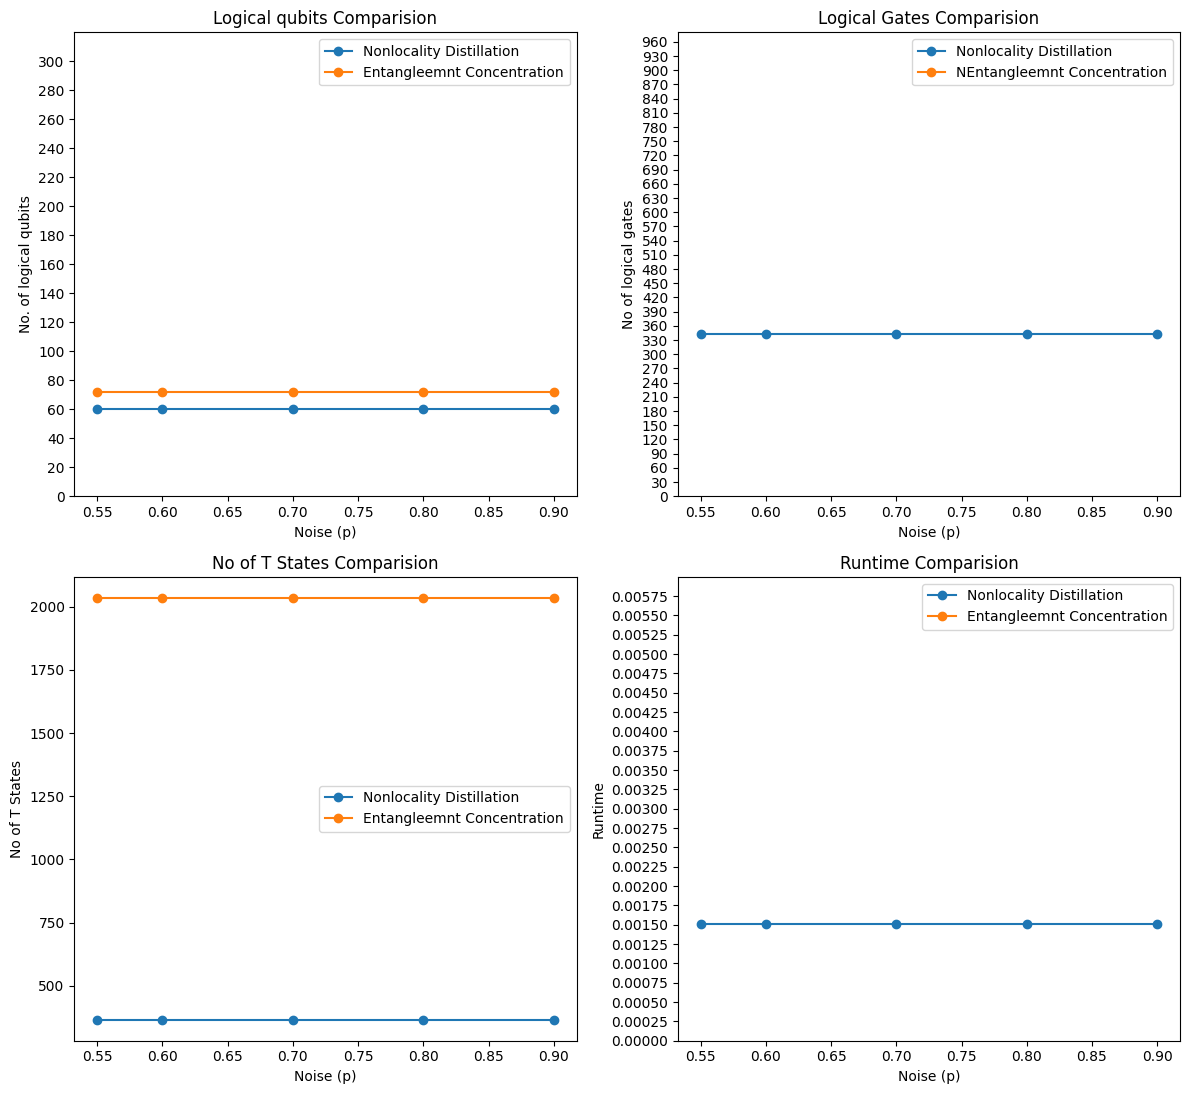

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# # Sample data for the graphs
# labels = [str(i) for i in range(1, 101)]
labels = [0.55,0.6,0.7,0.8,0.9] #Noise
# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# First subplot
axs[0, 0].plot(labels, Logical_qubits_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[0, 0].plot(labels, Logical_qubits_Qsharp_EC2, marker='o', label='Entangleemnt Concentration')
axs[0, 0].set_title('Logical qubits Comparision')
axs[0, 0].set_ylabel('No. of logical qubits')
axs[0, 0].set_xlabel("Noise (p)")
axs[0, 0].legend()
axs[0, 0].set_ylim(0, 320)  # Set y-axis limits
axs[0, 0].set_yticks(np.arange(0, 320, 20))  # Set y-axis ticks


# Second subplot
axs[0, 1].plot(labels, Logical_depth_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[0, 1].plot(labels, Logical_depth_Qsharp_EC2, marker='o', label='NEntangleemnt Concentration')
axs[0, 1].set_title('Logical Gates Comparision')
axs[0, 1].set_ylabel('No of logical gates')
axs[0, 1].set_xlabel("Noise (p)")
axs[0, 1].legend()
axs[0, 1].set_ylim(0, 980)  # Set y-axis limits
axs[0, 1].set_yticks(np.arange(0, 980, 30))  # Set y-axis ticks


# Third subplot
axs[1, 0].plot(labels, Num_T_gates_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[1, 0].plot(labels, Num_T_gates_Qsharp_EC2, marker='o', label='Entangleemnt Concentration')
axs[1, 0].set_title('No of T States Comparision')
axs[1, 0].set_ylabel('No of T States')
axs[1, 0].set_xlabel("Noise (p)")
axs[1, 0].legend()


# Fourth subplot
axs[1, 1].plot(labels, Runtime_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[1, 1].plot(labels, Runtime_Qsharp_EC2, marker='o', label='Entangleemnt Concentration')
axs[1, 1].set_title('Runtime Comparision')
axs[1, 1].set_ylabel('Runtime')
axs[1, 1].set_xlabel("Noise (p)")
axs[1, 1].legend()
axs[1, 1].set_ylim(0, 0.006)  # Set y-axis limits
axs[1, 1].set_yticks(np.arange(0, 0.006, 0.00025))  # Set y-axis ticks

# Adjust the layout
# plt.tight_layout()

# Add a title to the entire figure
# fig.suptitle('Simulation and Resource Estimation of Niels implimentation vs Current Methods of N Qubits GHZ state preparation', fontsize=12)

# Combine handles and labels from all subplots
# handles, labels = axs[0, 0].get_legend_handles_labels()

# # Create a single legend for the entire figure
# fig.legend(handles, labels, loc='Lower left', ncol=2)

# Create a single legend for the entire figure
# fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.1, 0.1))

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Save the figure
# plt.savefig('GHZ.png')

# Show the figure
plt.show()

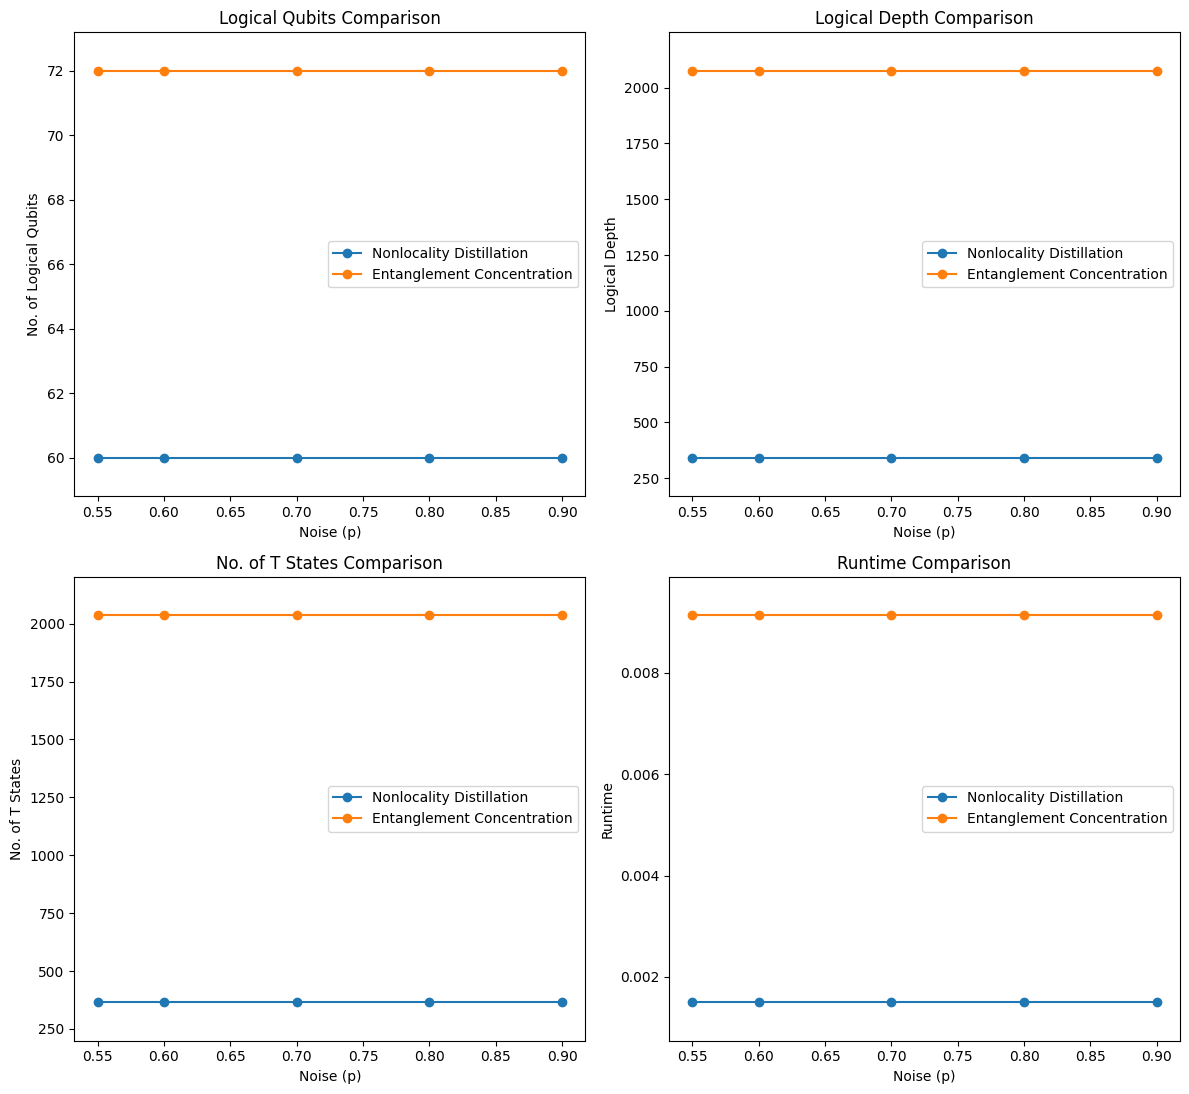

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
Logical_qubits_Qsharp_NL2 = [60, 60, 60, 60, 60]
Logical_depth_Qsharp_NL2 = [342, 342, 342, 342, 342]
Num_T_gates_Qsharp_NL2 = [366, 366, 366, 366, 366]
Runtime_Qsharp_NL2 = [0.0015048] * 5

Logical_qubits_Qsharp_EC2 = [72, 72, 72, 72, 72]
Logical_depth_Qsharp_EC2 = [2075, 2075, 2075, 2075, 2075]
Num_T_gates_Qsharp_EC2 = [2035, 2035, 2035, 2035, 2035]
Runtime_Qsharp_EC2 = [0.00913] * 5

labels = [0.55, 0.6, 0.7, 0.8, 0.9]  # Noise

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

def auto_ylim(ax, data1, data2, margin=0.1):
    """Set y-axis limits so both data sets fit with a margin."""
    all_data = np.array(data1 + data2)
    ymin, ymax = all_data.min(), all_data.max()
    yrange = ymax - ymin
    ax.set_ylim(ymin - margin * yrange, ymax + margin * yrange)

# Logical qubits
axs[0, 0].plot(labels, Logical_qubits_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[0, 0].plot(labels, Logical_qubits_Qsharp_EC2, marker='o', label='Entanglement Concentration')
axs[0, 0].set_title('Logical Qubits Comparison')
axs[0, 0].set_ylabel('No. of Logical Qubits')
axs[0, 0].set_xlabel("Noise (p)")
axs[0, 0].legend()
auto_ylim(axs[0, 0], Logical_qubits_Qsharp_NL2, Logical_qubits_Qsharp_EC2)

# Logical depth
axs[0, 1].plot(labels, Logical_depth_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[0, 1].plot(labels, Logical_depth_Qsharp_EC2, marker='o', label='Entanglement Concentration')
axs[0, 1].set_title('Logical Depth Comparison')
axs[0, 1].set_ylabel('Logical Depth')
axs[0, 1].set_xlabel("Noise (p)")
axs[0, 1].legend()
auto_ylim(axs[0, 1], Logical_depth_Qsharp_NL2, Logical_depth_Qsharp_EC2)

# T gates
axs[1, 0].plot(labels, Num_T_gates_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[1, 0].plot(labels, Num_T_gates_Qsharp_EC2, marker='o', label='Entanglement Concentration')
axs[1, 0].set_title('No. of T States Comparison')
axs[1, 0].set_ylabel('No. of T States')
axs[1, 0].set_xlabel("Noise (p)")
axs[1, 0].legend()
auto_ylim(axs[1, 0], Num_T_gates_Qsharp_NL2, Num_T_gates_Qsharp_EC2)

# Runtime
axs[1, 1].plot(labels, Runtime_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[1, 1].plot(labels, Runtime_Qsharp_EC2, marker='o', label='Entanglement Concentration')
axs[1, 1].set_title('Runtime Comparison')
axs[1, 1].set_ylabel('Runtime')
axs[1, 1].set_xlabel("Noise (p)")
axs[1, 1].legend()
auto_ylim(axs[1, 1], Runtime_Qsharp_NL2, Runtime_Qsharp_EC2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig('NLD2VEC2_QRE.png')

plt.show()


